In [206]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [207]:
iris_data = load_iris()
attributes, labels = iris_data.data,iris_data.target

In [208]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(attributes,labels,test_size = 0.3,train_size = 0.7)

In [209]:
model = DecisionTreeClassifier()
model.fit(attributes_train,labels_train)
print(model.score(attributes_test,labels_test))

0.9555555555555556


In [210]:
model.feature_importances_

array([0.        , 0.02958015, 0.40404935, 0.5663705 ])

In [211]:
model2 = DecisionTreeClassifier(max_depth=2)
model2.fit(attributes_train,labels_train)
print(model2.score(attributes_test,labels_test))

0.9555555555555556


In [212]:
model2.feature_importances_

array([0., 0., 1., 0.])

In [213]:
X = iris_data.data[:, :2] # Sepal length, sepal width
y = iris_data.target
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

In [214]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

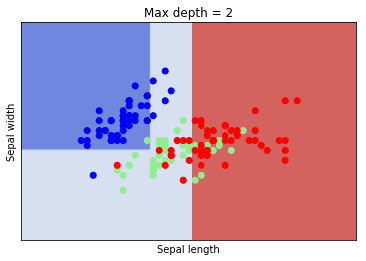

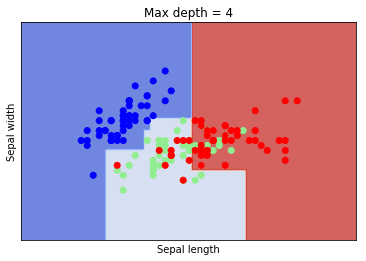

In [215]:
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [216]:
tree = DecisionTreeClassifier(max_depth = 1)

tree.fit(attributes_train, labels_train)

train_pred = accuracy_score(labels_train, tree.predict(attributes_train))

test_pred = accuracy_score(labels_test, tree.predict(attributes_test))

print(
"Decision tree train / test accuracies: %.3f / %.3f",
(train_pred, test_pred))

Decision tree train / test accuracies: %.3f / %.3f (0.6857142857142857, 0.6222222222222222)


In [217]:
tree = DecisionTreeClassifier(max_depth = 1)
ada = AdaBoostClassifier(base_estimator = tree,
n_estimators =100, learning_rate = 0.1)
ada.fit(attributes_train, labels_train)
train_pred = accuracy_score(labels_train, ada.predict(attributes_train))
test_pred = accuracy_score(labels_test, ada.predict(attributes_test))
print(
"AdaBoost tree train / test accuracies: %.3f / %.3f",
(train_pred, test_pred))

AdaBoost tree train / test accuracies: %.3f / %.3f (0.9047619047619048, 0.9777777777777777)
